In [109]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
%store -r  final_merge
%store -r ready_df
%store -r orders_months

In [111]:
#creating new dataframe
orders_weekdays = final_merge.copy()

orders_weekdays.head(5)
orders_weekdays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            5010 non-null   object        
 1   order_date          5010 non-null   datetime64[ns]
 2   state               5010 non-null   object        
 3   region              5010 non-null   object        
 4   ship_mode           5010 non-null   object        
 5   ready_to_ship_date  204 non-null    datetime64[ns]
 6   pickup_date         3003 non-null   datetime64[ns]
 7   arrival_scan_date   333 non-null    datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 313.2+ KB


In [112]:
#creating weekdays for orders

orders_weekdays['order_day'] = orders_weekdays['order_date'].dt.day_name()



In [113]:
orders_weekdays.order_day.value_counts()

order_day
Thursday     885
Tuesday      884
Wednesday    846
Friday       791
Monday       730
Saturday     458
Sunday       416
Name: count, dtype: int64

In [114]:
orders_weekdays.order_day.size

5010

In [115]:
orders_weekdays.order_day.isna().sum()

0

In [116]:
orders_weekdays.order_day.nunique()

7

In [117]:
orders_weekdays.order_day.mode()

0    Thursday
Name: order_day, dtype: object

In [118]:
# creating weekend days for orders

orders_weekdays['order_weekend'] = orders_weekdays['order_day'].isin(['Saturday', 'Sunday']).astype(int)

In [119]:
orders_weekdays.order_weekend.head(5)

0    0
1    1
2    0
3    1
4    1
Name: order_weekend, dtype: int64

In [120]:
orders_weekdays.order_weekend.isna().sum()

0

In [121]:
orders_weekdays.order_weekend.describe()

count    5010.000000
mean        0.174451
std         0.379535
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: order_weekend, dtype: float64

DESCRIPTIVE STATISTICS

In [122]:
orders_weekdays.describe()

,order_date,ready_to_ship_date,pickup_date,arrival_scan_date,order_weekend
count,5010,204,3003,333,5010.000000
mean,2019-05-08 11:57:24.790419200,2020-07-07 01:03:31.764705792,2020-03-07 00:00:00.000000256,2019-10-14 19:36:12.972973056,0.174451
min,2017-01-03 00:00:00,2019-09-02 00:00:00,2019-01-07 00:00:00,2019-05-03 00:00:00,0.000000
25%,2018-05-31 00:00:00,2019-09-24 00:00:00,2019-09-20 00:00:00,2019-09-09 00:00:00,0.000000
50%,2019-07-10 00:00:00,2020-11-12 00:00:00,2020-03-25 00:00:00,2019-10-21 00:00:00,0.000000
75%,2020-05-19 18:00:00,2020-11-23 00:00:00,2020-09-18 00:00:00,2019-12-16 00:00:00,0.000000
max,2020-12-30 00:00:00,2020-12-07 00:00:00,2021-01-06 00:00:00,2020-05-15 00:00:00,1.000000
std,NaN,NaN,NaN,NaN,0.379535


In [123]:
orders_weekdays.order_weekend.nunique()

2

In [145]:
orders_weekdays.ship_mode.value_counts()

ship_mode
Standard Processing    3958
Express                1052
Name: count, dtype: int64

In [125]:
orders_weekdays.ship_mode


0       Standard Processing
1       Standard Processing
2       Standard Processing
3       Standard Processing
4       Standard Processing
               ...         
5005    Standard Processing
5006    Standard Processing
5007                Express
5008    Standard Processing
5009                Express
Name: ship_mode, Length: 5010, dtype: object

In [126]:
orders_weekdays['ship_mode_cat']= orders_weekdays['ship_mode'].astype('category')


In [127]:
orders_weekdays['ship_mode_cat'].dtypes

CategoricalDtype(categories=['Express', 'Standard Processing'], ordered=False, categories_dtype=object)

###VISUALIZATIONS###

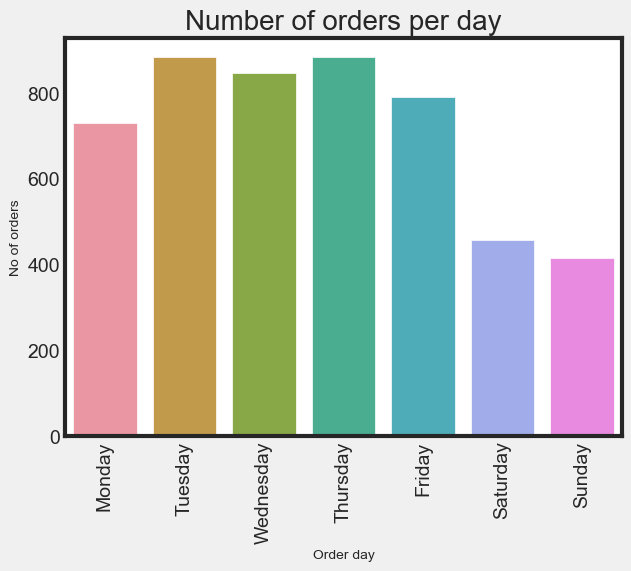

In [135]:
# KPI 1: Plot number of orders per weekday
#plt.figure(figsize=(15,8)) # specify figure size
plt.style.use('fivethirtyeight')
fig.tight_layout()   # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .6, wspace = .2, top = .9) # adjusts the space between the single subplots
sns.set_style("white")
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
sns.set_style({'axes.facecolor':'white', 'grid.color': 'white'})

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
f1 = sns.countplot(x=orders_weekdays['order_day'], order=weekday_order) # create countplot
f1.tick_params(axis='x', rotation=90) # get x-ticks and rotate them
f1.set_xlabel("Order day", fontsize = 10)
#f1.set_xticklabels(labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
f1.set_ylabel("No of orders", fontsize = 10); # set label for y-axis
f1.set_title('Number of orders per day', fontsize=20); # set title

In [129]:
orders_weekdays.ship_mode.value_counts()

ship_mode
Standard Processing    3958
Express                1052
Name: count, dtype: int64

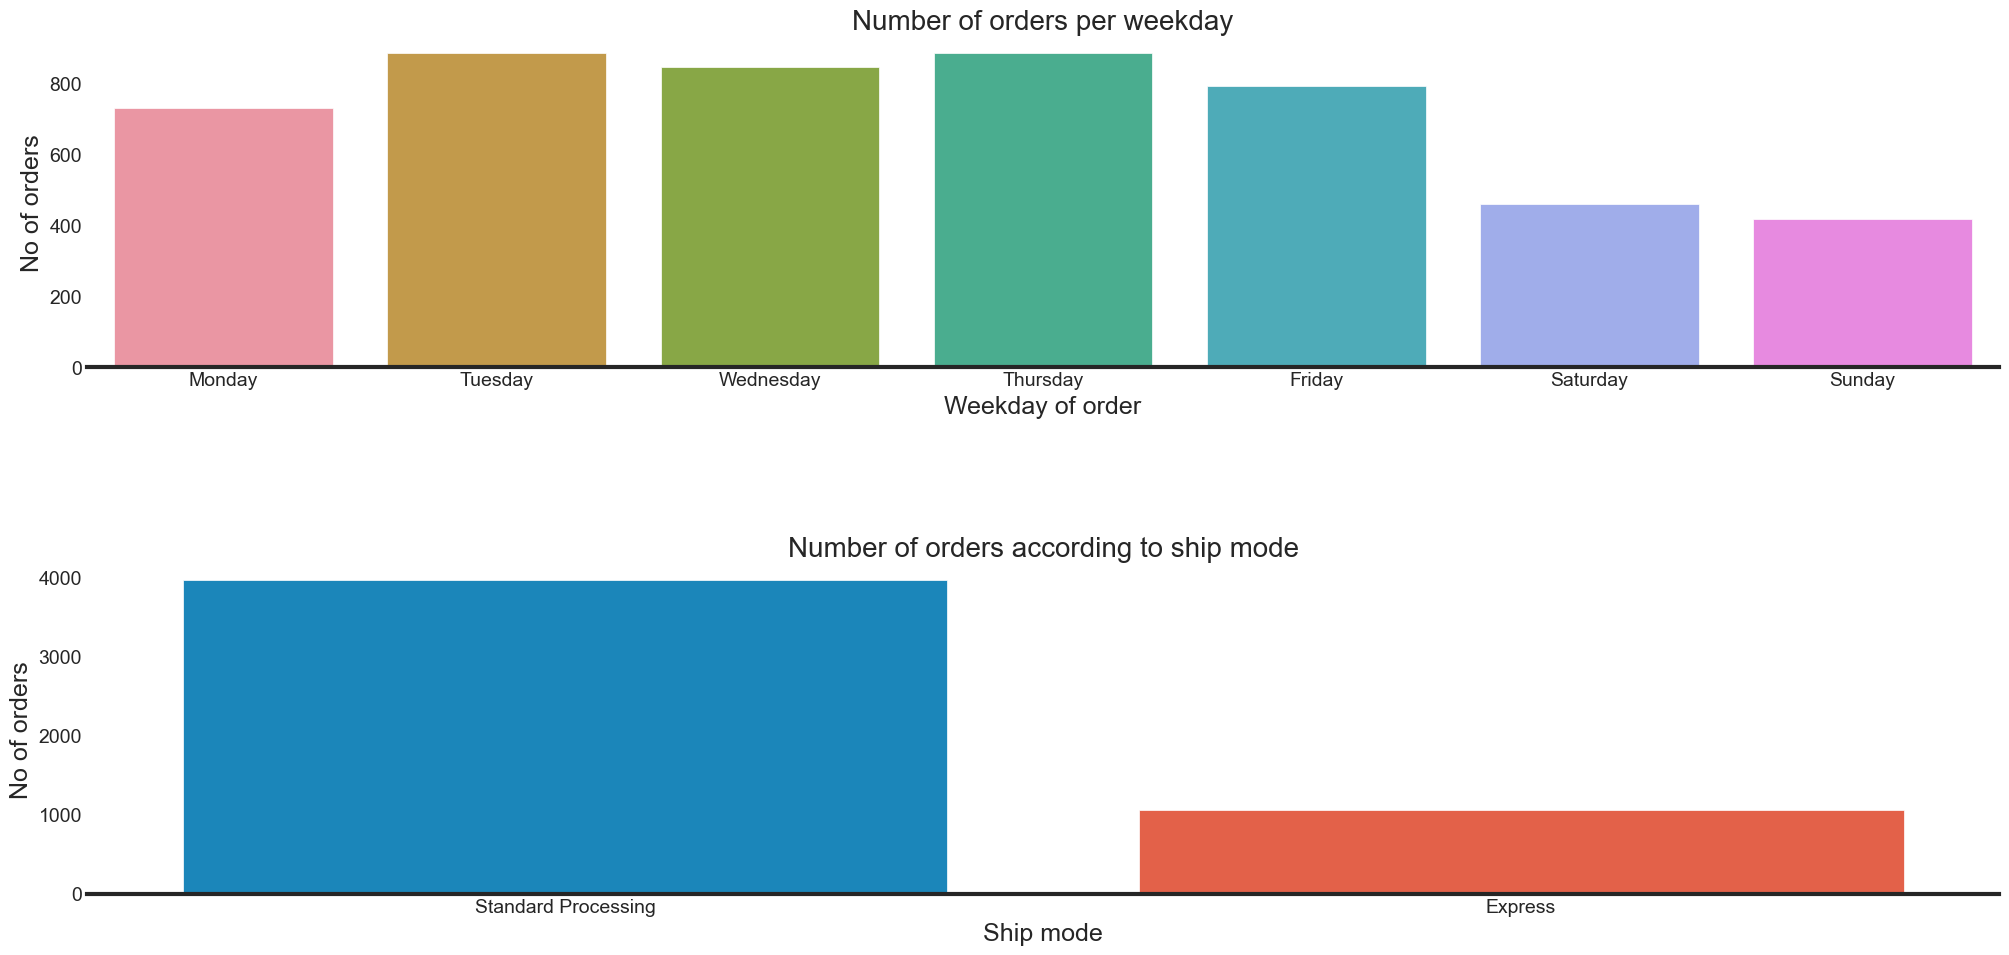

In [144]:
#KPI 2: Number of orders differ according to day and ship mode
fig, ax = plt.subplots(2,1, figsize=(20,10))
#plt.suptitle('Orders per day', fontsize=25)
fig.tight_layout(h_pad=8) 
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9)

plt.style.use('fivethirtyeight')
  # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .6, wspace = .2, top = .9) # adjusts the space between the single subplots
sns.set_style("white")
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
sns.set_style({'axes.facecolor':'white', 'grid.color': 'white'})

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
f1 = sns.countplot(x=orders_weekdays['order_day'], ax=ax[0], order=weekday_order) # create countplot

f1.set_ylabel("No of orders", fontsize = 18)
f1.set_xlabel("Weekday of order", fontsize = 18)
f1.set_xticklabels(labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
f1.set_title("Number of orders per weekday", fontsize = 20);

f2 = sns.countplot(x=orders_weekdays['ship_mode'], ax=ax[1])

f2.set_ylabel("No of orders", fontsize = 18)
f2.set_xlabel("Ship mode", fontsize = 18)
f2.set_title("Number of orders according to ship mode", fontsize = 20);

In [131]:
#sns.scatterplot(x='order_month', y='region', data=orders_months, hue='species

In [132]:
%store orders_weekdays

Stored 'orders_weekdays' (DataFrame)
